<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/geoprocessing_vector_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geoprocessing Vector Data

Zia Ahmed, Univerity at Buffalo

Geoprocessing refers to a set of techniques and tools used in geographic information systems (GIS) and remote sensing to manipulate, analyze, and visualize spatial data. Geoprocessing involves various operations that allow you to perform spatial analysis and data transformations on geographic datasets. It plays a crucial role in making sense of spatial information and deriving valuable insights from geographical data.

To get started with geoprocessing in R, you'll typically follow these steps:

1.  **Load Data:** Read your geospatial data into R using packages like **raster**,, **`rgdal`** or **`sf`**.

2.  **Data Manipulation:** Use functions from the chosen package to manipulate and preprocess your spatial data, such as merging datasets, clipping, reprojecting, and cleaning.

3.  **Spatial Analysis:** Apply spatial analysis techniques using functions from packages like **`rgeos`**, **`spatial`**, or **`spatstat`**.

4.  **Visualization:** Create maps and visualizations using packages like **`leaflet`**, **`tmap`**, or built-in R plotting functions.

5.  **Export Results:** Export your geoprocessing results to various formats or create interactive web maps for sharing

### The tidyverse and spatial data

The tidyverse is a collection of R packages designed to make data manipulation, analysis, and visualization more user-friendly and consistent. It promotes a "tidy" data format where each variable forms a column, each observation forms a row, and each type of observational unit forms a table. While the tidyverse is primarily focused on tabular data, it can also be used effectively for working with spatial data using the appropriate packages.

When it comes to working with spatial data within the tidyverse framework, the **`sf`** package (Simple Features) plays a central role. The **`sf`** package provides a tidy data structure for vector spatial data (points, lines, polygons) and integrates seamlessly with other tidyverse packages. Here's how you can use the tidyverse for spatial data:

1.  **Load Data:** Use the **`read_sf()`** function from the **`sf`** package to read spatial data into a tidy data frame. This function reads various spatial formats, such as shapefiles, GeoJSON, and more.

2.  **Data Manipulation:** Utilize familiar tidyverse functions like **`filter()`**, **`select()`**, **`mutate()`**, and **`group_by()`** to manipulate your spatial data. These functions work seamlessly with the tidy data structure of the **`sf`** package.

3.  **Spatial Operations:** Perform spatial operations using the **`sf`** package's functions, such as buffering, clipping, and spatial joins. These functions are designed to work well within the tidyverse paradigm.

4.  **Visualization:** Create visualizations of spatial data using tidyverse-friendly packages like **`ggplot2`**. You can use the **`%>%`** pipe operator to chain together data manipulation and visualization steps.

5.  **Integration with Other Packages:** The **`sf`** package works well with other tidyverse packages like **`dplyr`**, **`tidyr`**, and **`ggplot2`**. This allows you to seamlessly integrate spatial data analysis with tabular data manipulation and visualization.

In this exercise, we will learn the following Data Manipulation tasks as Geo-processing operations of vector data in R.

-   Rename column

-   Clipping

-   Union

-   Dissolve

-   Intersect

-   Erase

-   Convex Hull

-   Buffer

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314930 sha256=2b219d727ea8682207aeb119811f7bb0e33f83f81911a77eeda0c0b61afc6a3e
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install Packagess

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf', 'rgeos' 'tidyverse', 'devtools'), lib='drive/My Drive/R/')

### Load Library

In [7]:
%%R
.libPaths('drive/My Drive/R')
library(sf)
library (rgdal)
library (raster)
library(tidyverse)
library(rgeos)
library(maptools)

 GEOS runtime version: 3.10.2-CAPI-1.16.0 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 


Attaching package: ‘rgeos’



    symdiff


plan transition at your earliest convenience (see
https://r-spatial.org/r/2023/05/15/evolution4.html and earlier blogs
for guidance);some functionality will be moved to 'sp'.
 Checking rgeos availability: TRUE



### Data

In this exercise we use following data set:

1.  Spatial polygon of the district of Bangladesh (bd_district_UTM.shp)

2.  Spatial polygon of the division of Bangladesh (bd_division_UTM.shp)

3.  Spatial point data of soil sampling location under Rajshahi Division of Bangladesh

4.  Spatial line of road net work of Rajshai division

You may also use **st_read()** from **sf** package to load shapefile directly from my github using GDAL Virtual File Systems (vsicurl).

In [34]:
%%R
div.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp")
dist.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles//bd_district_BTM.shp")


Reading layer `bd_division_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs
Reading layer `bd_district_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles//bd_district_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64 features and 14 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


### Rename column

First we  check the attribute tables associate with these shape files with **dplyr::glimpse()** function:

In [35]:
%%R
# division
glimpse(div.st)

Rows: 8
Columns: 13
$ Shape_Leng <dbl> 25.424604, 30.287321, 12.197758, 38.409385, 8.166577, 8.410…
$ Shape_Area <dbl> 0.8893951, 2.7377958, 1.8065059, 1.8265749, 0.9418117, 1.62…
$ ADM1_EN    <chr> "Barisal", "Chittagong", "Dhaka", "Khulna", "Mymensingh", "…
$ ADM1_PCODE <chr> "BD10", "BD20", "BD30", "BD40", "BD45", "BD50", "BD55", "BD…
$ ADM1_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ ADM1ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ ADM1ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD"
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> "2020/11/13", "2020/11/13", "2020/11/13", "2020/11/13", "20…
$ validTo    <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ geometry   <MULTIPOLYGON [m]> MULTIPOLYGON (((549370.8 40..., MULTIPOLYGON (((742495 2835…


In [36]:
%%R
#district
glimpse(dist.st)

Rows: 64
Columns: 15
$ Shape_Leng <dbl> 12.929816, 5.358126, 4.167970, 7.713625, 10.091155, 4.28923…
$ Shape_Area <dbl> 0.31970868, 0.40135919, 0.11780114, 0.19522826, 0.17081236,…
$ ADM2_EN    <chr> "Bagerhat", "Bandarban", "Barguna", "Barisal", "Bhola", "Bo…
$ ADM2_PCODE <chr> "BD4001", "BD2003", "BD1004", "BD1006", "BD1009", "BD5010",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM1_EN    <chr> "Khulna", "Chittagong", "Barisal", "Barisal", "Barisal", "R…
$ ADM1_PCODE <chr> "BD40", "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

Division and district name are in the attribute tables named as "ADM1_EN" and "ADM2_EN, respectively. We rename these attribute as "DIV_Name" and "DIST_Name" using **dplyr::rename()** function

In [37]:
%%R
div=rename(div.st, DIV_Name = ADM1_EN)
glimpse(div)

Rows: 8
Columns: 13
$ Shape_Leng <dbl> 25.424604, 30.287321, 12.197758, 38.409385, 8.166577, 8.410…
$ Shape_Area <dbl> 0.8893951, 2.7377958, 1.8065059, 1.8265749, 0.9418117, 1.62…
$ DIV_Name   <chr> "Barisal", "Chittagong", "Dhaka", "Khulna", "Mymensingh", "…
$ ADM1_PCODE <chr> "BD10", "BD20", "BD30", "BD40", "BD45", "BD50", "BD55", "BD…
$ ADM1_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ ADM1ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ ADM1ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD"
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> "2020/11/13", "2020/11/13", "2020/11/13", "2020/11/13", "20…
$ validTo    <chr> NA, NA, NA, NA, NA, NA, NA, NA
$ geometry   <MULTIPOLYGON [m]> MULTIPOLYGON (((549370.8 40..., MULTIPOLYGON (((742495 2835…


In [38]:
%%R
dist=rename(dist.st, DIST_Name = ADM2_EN, DIV_Name = ADM1_EN)
glimpse(dist)

Rows: 64
Columns: 15
$ Shape_Leng <dbl> 12.929816, 5.358126, 4.167970, 7.713625, 10.091155, 4.28923…
$ Shape_Area <dbl> 0.31970868, 0.40135919, 0.11780114, 0.19522826, 0.17081236,…
$ DIST_Name  <chr> "Bagerhat", "Bandarban", "Barguna", "Barisal", "Bhola", "Bo…
$ ADM2_PCODE <chr> "BD4001", "BD2003", "BD1004", "BD1006", "BD1009", "BD5010",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ DIV_Name   <chr> "Khulna", "Chittagong", "Barisal", "Barisal", "Barisal", "R…
$ ADM1_PCODE <chr> "BD40", "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

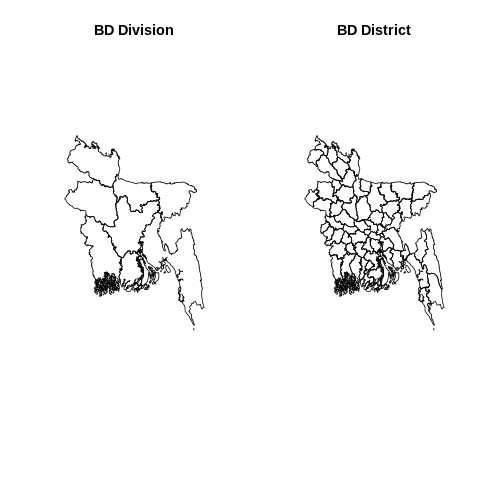

In [39]:
%%R
par(mfrow=c(1,2))
plot(div$geometry, main="BD Division")
plot(dist$geometry, main="BD District")
par(mfrow=c(1,1))

We can extract the division names

In [41]:
%%R
dist$DIST_Name

 [1] "Bagerhat"      "Bandarban"     "Barguna"       "Barisal"      
 [5] "Bhola"         "Bogra"         "Brahamanbaria" "Chandpur"     
 [9] "Chittagong"    "Chuadanga"     "Comilla"       "Cox's Bazar"  
[13] "Dhaka"         "Dinajpur"      "Faridpur"      "Feni"         
[17] "Gaibandha"     "Gazipur"       "Gopalganj"     "Habiganj"     
[21] "Jamalpur"      "Jessore"       "Jhalokati"     "Jhenaidah"    
[25] "Joypurhat"     "Khagrachhari"  "Khulna"        "Kishoreganj"  
[29] "Kurigram"      "Kushtia"       "Lakshmipur"    "Lalmonirhat"  
[33] "Madaripur"     "Magura"        "Manikganj"     "Maulvibazar"  
[37] "Meherpur"      "Munshiganj"    "Mymensingh"    "Naogaon"      
[41] "Narail"        "Narayanganj"   "Narsingdi"     "Natore"       
[45] "Nawabganj"     "Netrakona"     "Nilphamari"    "Noakhali"     
[49] "Pabna"         "Panchagarh"    "Patuakhali"    "Pirojpur"     
[53] "Rajbari"       "Rajshahi"      "Rangamati"     "Rangpur"      
[57] "Satkhira"      "Shariatpur" 


### Clipping

Clipping spatial data involves selecting a subset of spatial features (points, lines, polygons) from one dataset that are located within the boundaries of another dataset. This operation is commonly used to extract relevant geographic features or study areas from larger spatial datasets. For vector data, it involves removing unwanted features outside of an area of interest. For example, you might want to do some geospatial modeling covering a area in New York state, but we may have data for USA, in this case you need to apply clipping function to remove area outside of the New York State. It acts like a cookie cutter to cut out a piece of one feature class using one or more of the features in another feature class.

In R, you can do this several ways with different R packages. In this exercise, we will clip out other division  or districts from division and district shape files, expect our area of interest (for example Rajshai Division).


#### Filter

We can apply **dplyr::filter()** function to extract all district under "Rangpur", "Rajshahi" divisions


In [42]:
%%R
div.2<-dist %>%
  filter(DIV_Name %in% c("Rangpur", "Rajshahi")) %>%
  glimpse()

Rows: 16
Columns: 15
$ Shape_Leng <dbl> 4.289236, 5.058337, 3.219218, 2.214957, 5.066197, 5.370949,…
$ Shape_Area <dbl> 0.26009774, 0.31100548, 0.19421210, 0.08593419, 0.20481886,…
$ DIST_Name  <chr> "Bogra", "Dinajpur", "Gaibandha", "Joypurhat", "Kurigram", …
$ ADM2_PCODE <chr> "BD5010", "BD5527", "BD5532", "BD5038", "BD5549", "BD5552",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ DIV_Name   <chr> "Rajshahi", "Rangpur", "Rangpur", "Rajshahi", "Rangpur", "R…
$ ADM1_PCODE <chr> "BD50", "BD55", "BD55", "BD50", "BD55", "BD55", "BD50", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

We can use ggplot2 dirrectly to map them

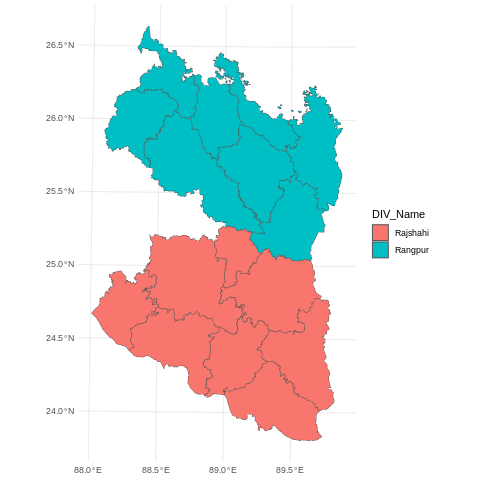

In [43]:
%%R
dist %>%
  filter(DIV_Name %in% c("Rangpur", "Rajshahi")) %>%
  ggplot() +
  geom_sf(aes(fill = DIV_Name)) +
  theme_minimal()

#### Subset

In [44]:
%%R
# raj divison boundary
raj.div <- subset(div, DIV_Name=="Rajshahi")
# district
raj.dist<- subset(dist, DIV_Name=="Rajshahi")
raj.dist

Simple feature collection with 8 features and 14 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 633043 xmax: 482210.3 ymax: 796039.8
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs
   Shape_Leng Shape_Area DIST_Name ADM2_PCODE ADM2_REF ADM2ALT1EN ADM2ALT2EN
6    4.289236 0.26009774     Bogra     BD5010     <NA>       <NA>       <NA>
25   2.214957 0.08593419 Joypurhat     BD5038     <NA>       <NA>       <NA>
40   5.098052 0.30772759   Naogaon     BD5064     <NA>       <NA>       <NA>
44   3.458987 0.16947264    Natore     BD5069     <NA>       <NA>       <NA>
45   3.329448 0.15038568 Nawabganj     BD5070     <NA>       <NA>       <NA>
49   3.078707 0.21210274     Pabna     BD5076     <NA>       <NA>       <NA>
54   3.499923 0.21714336  Rajshahi     BD5081     <NA>       <NA>       <NA>
60   3.596003 0.22199195 Sirajganj     BD5088     <NA>       <NA>       <NA>
   DIV_Name ADM1_PC

After sub setting, you notice that  retains both geometry and attribute information of parent polygon

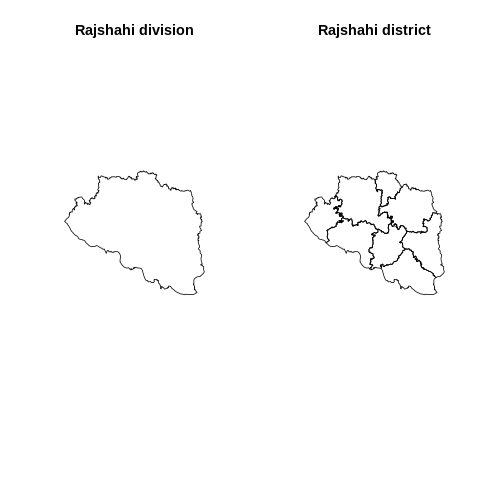

In [45]:
%%R
par(mfrow=c(1,2))
plot(raj.div$geometry, main="Rajshahi division")
plot(raj.dist$geometry, main="Rajshahi district")
par(mfrow=c(1,1))

#### st_intersection

To clip the larger dataset using the study area, you can use the **st_intersection()** function from the **sf** package.

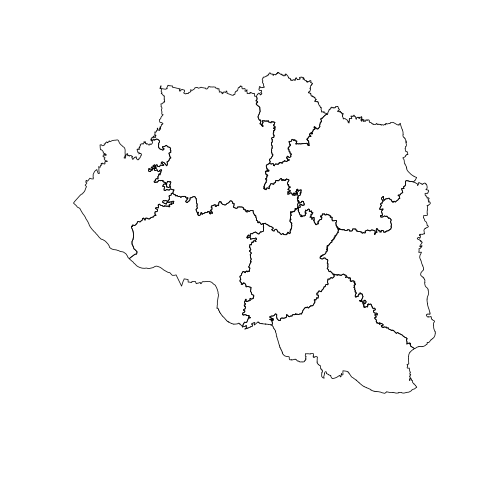

In [47]:
%%R
clip_01<-st_intersection(dist, raj.div)
plot(clip_01$geom)

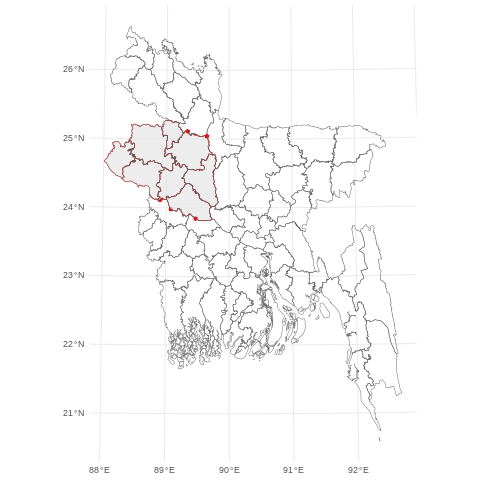

In [48]:
%%R
ggplot() +
  geom_sf(data = clip_01, color = "red", alpha = 0.7) +
  geom_sf(data =dist, fill = "transparent") +
  theme_minimal()